The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

# Preparing the Dataset

In [345]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Start coding here!

In [346]:
data_path = "data/nobel.csv"
df = pd.read_csv(data_path)

In [347]:
df.shape

(1000, 18)

In [348]:
df.head(10)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland


In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [350]:
df.columns.tolist()

['year',
 'category',
 'prize',
 'motivation',
 'prize_share',
 'laureate_id',
 'laureate_type',
 'full_name',
 'birth_date',
 'birth_city',
 'birth_country',
 'sex',
 'organization_name',
 'organization_city',
 'organization_country',
 'death_date',
 'death_city',
 'death_country']

In [351]:
df.isnull().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               32
birth_city               36
birth_country            31
sex                      30
organization_name       264
organization_city       265
organization_country    265
death_date              404
death_city              421
death_country           415
dtype: int64

# What is the most commomly awarded gender and birth country?

the gender with highest nobel prize awards : Male , count : 904


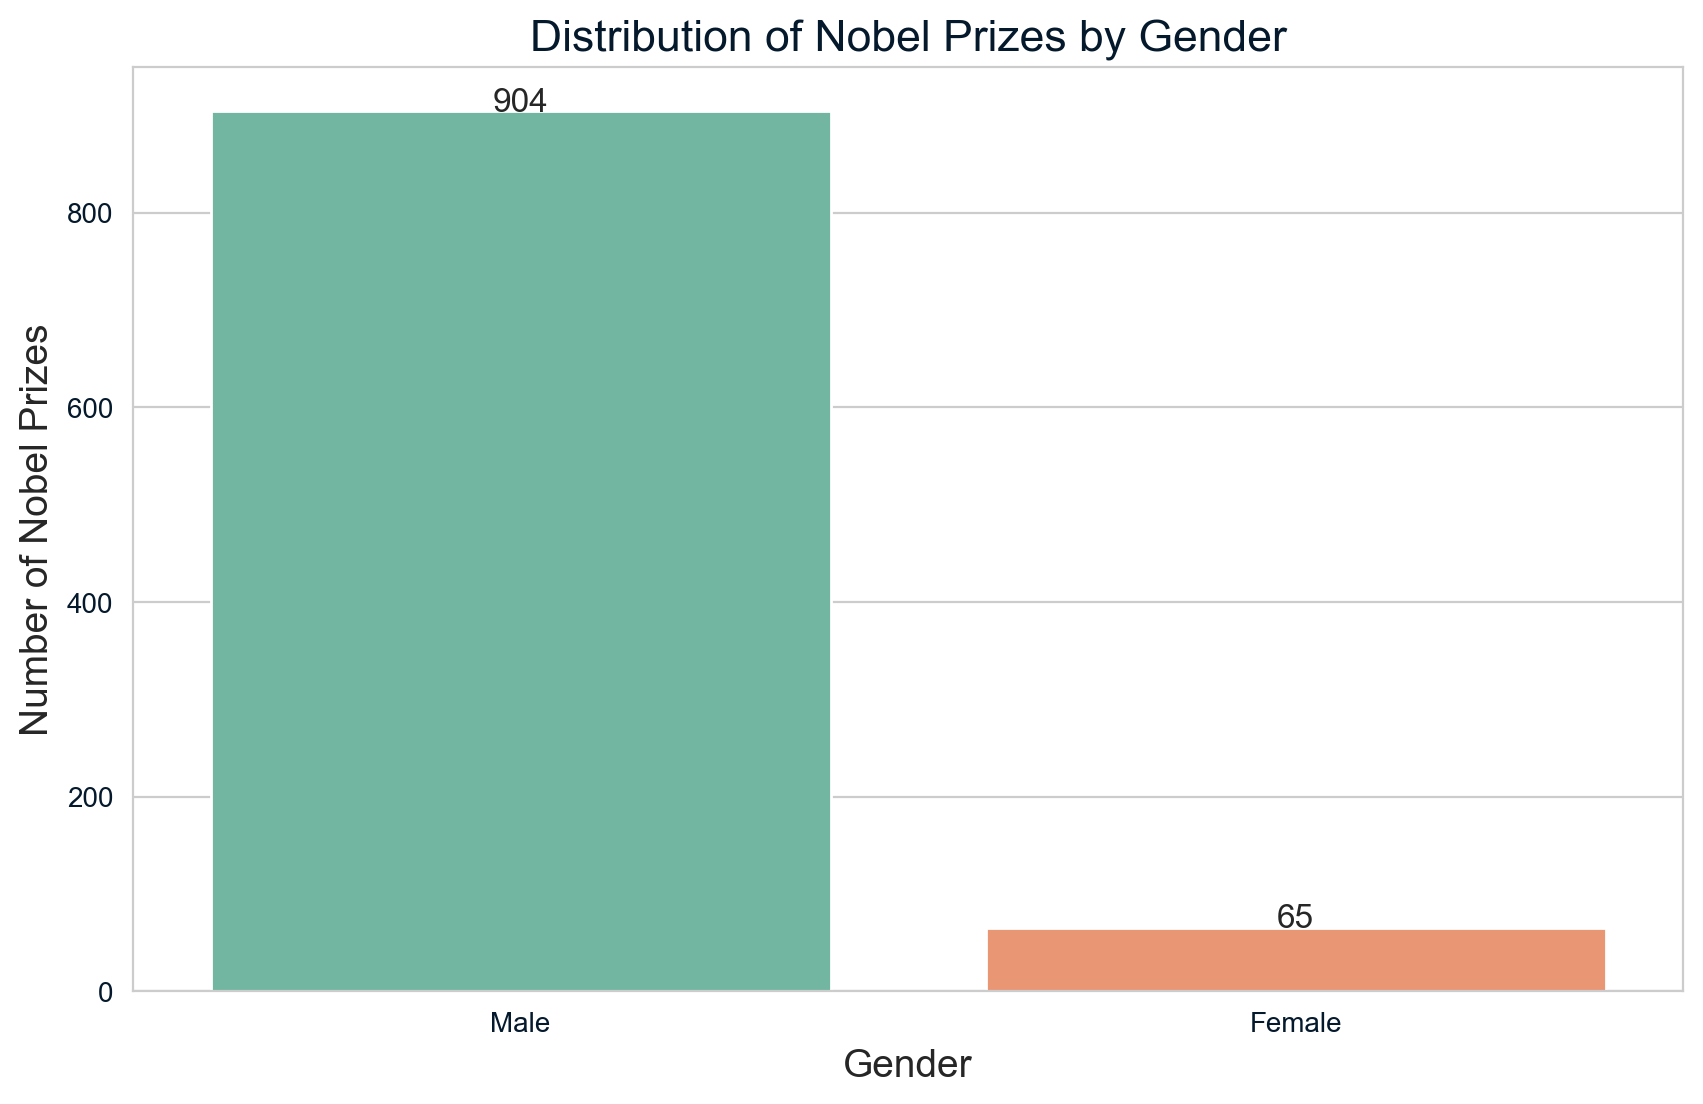

In [352]:
# removing null records in sex and birth columns
df2 = df
df2.dropna(subset = ["sex", "birth_country"], inplace=True)
df2.shape

# counting number of nobel prizes per gender
gender_count = df2["sex"].value_counts()
top_gender = gender_count.idxmax()
top_gender_count = gender_count.max()
print(f"the gender with highest nobel prize awards : {top_gender} , count : {top_gender_count}")

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Bar plot
g = sns.barplot(x=gender_count.index, y=gender_count.values, palette="Set2")

# Add labels to the bars
for index, value in enumerate(gender_count.values):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=12)

# Customize the plot
g.set_title('Distribution of Nobel Prizes by Gender', fontsize=16)
g.set_xlabel('Gender', fontsize=14)
g.set_ylabel('Number of Nobel Prizes', fontsize=14)

# Show the plot
plt.show()

the birth country with highest nobel prize awards : United States of America , count : 291


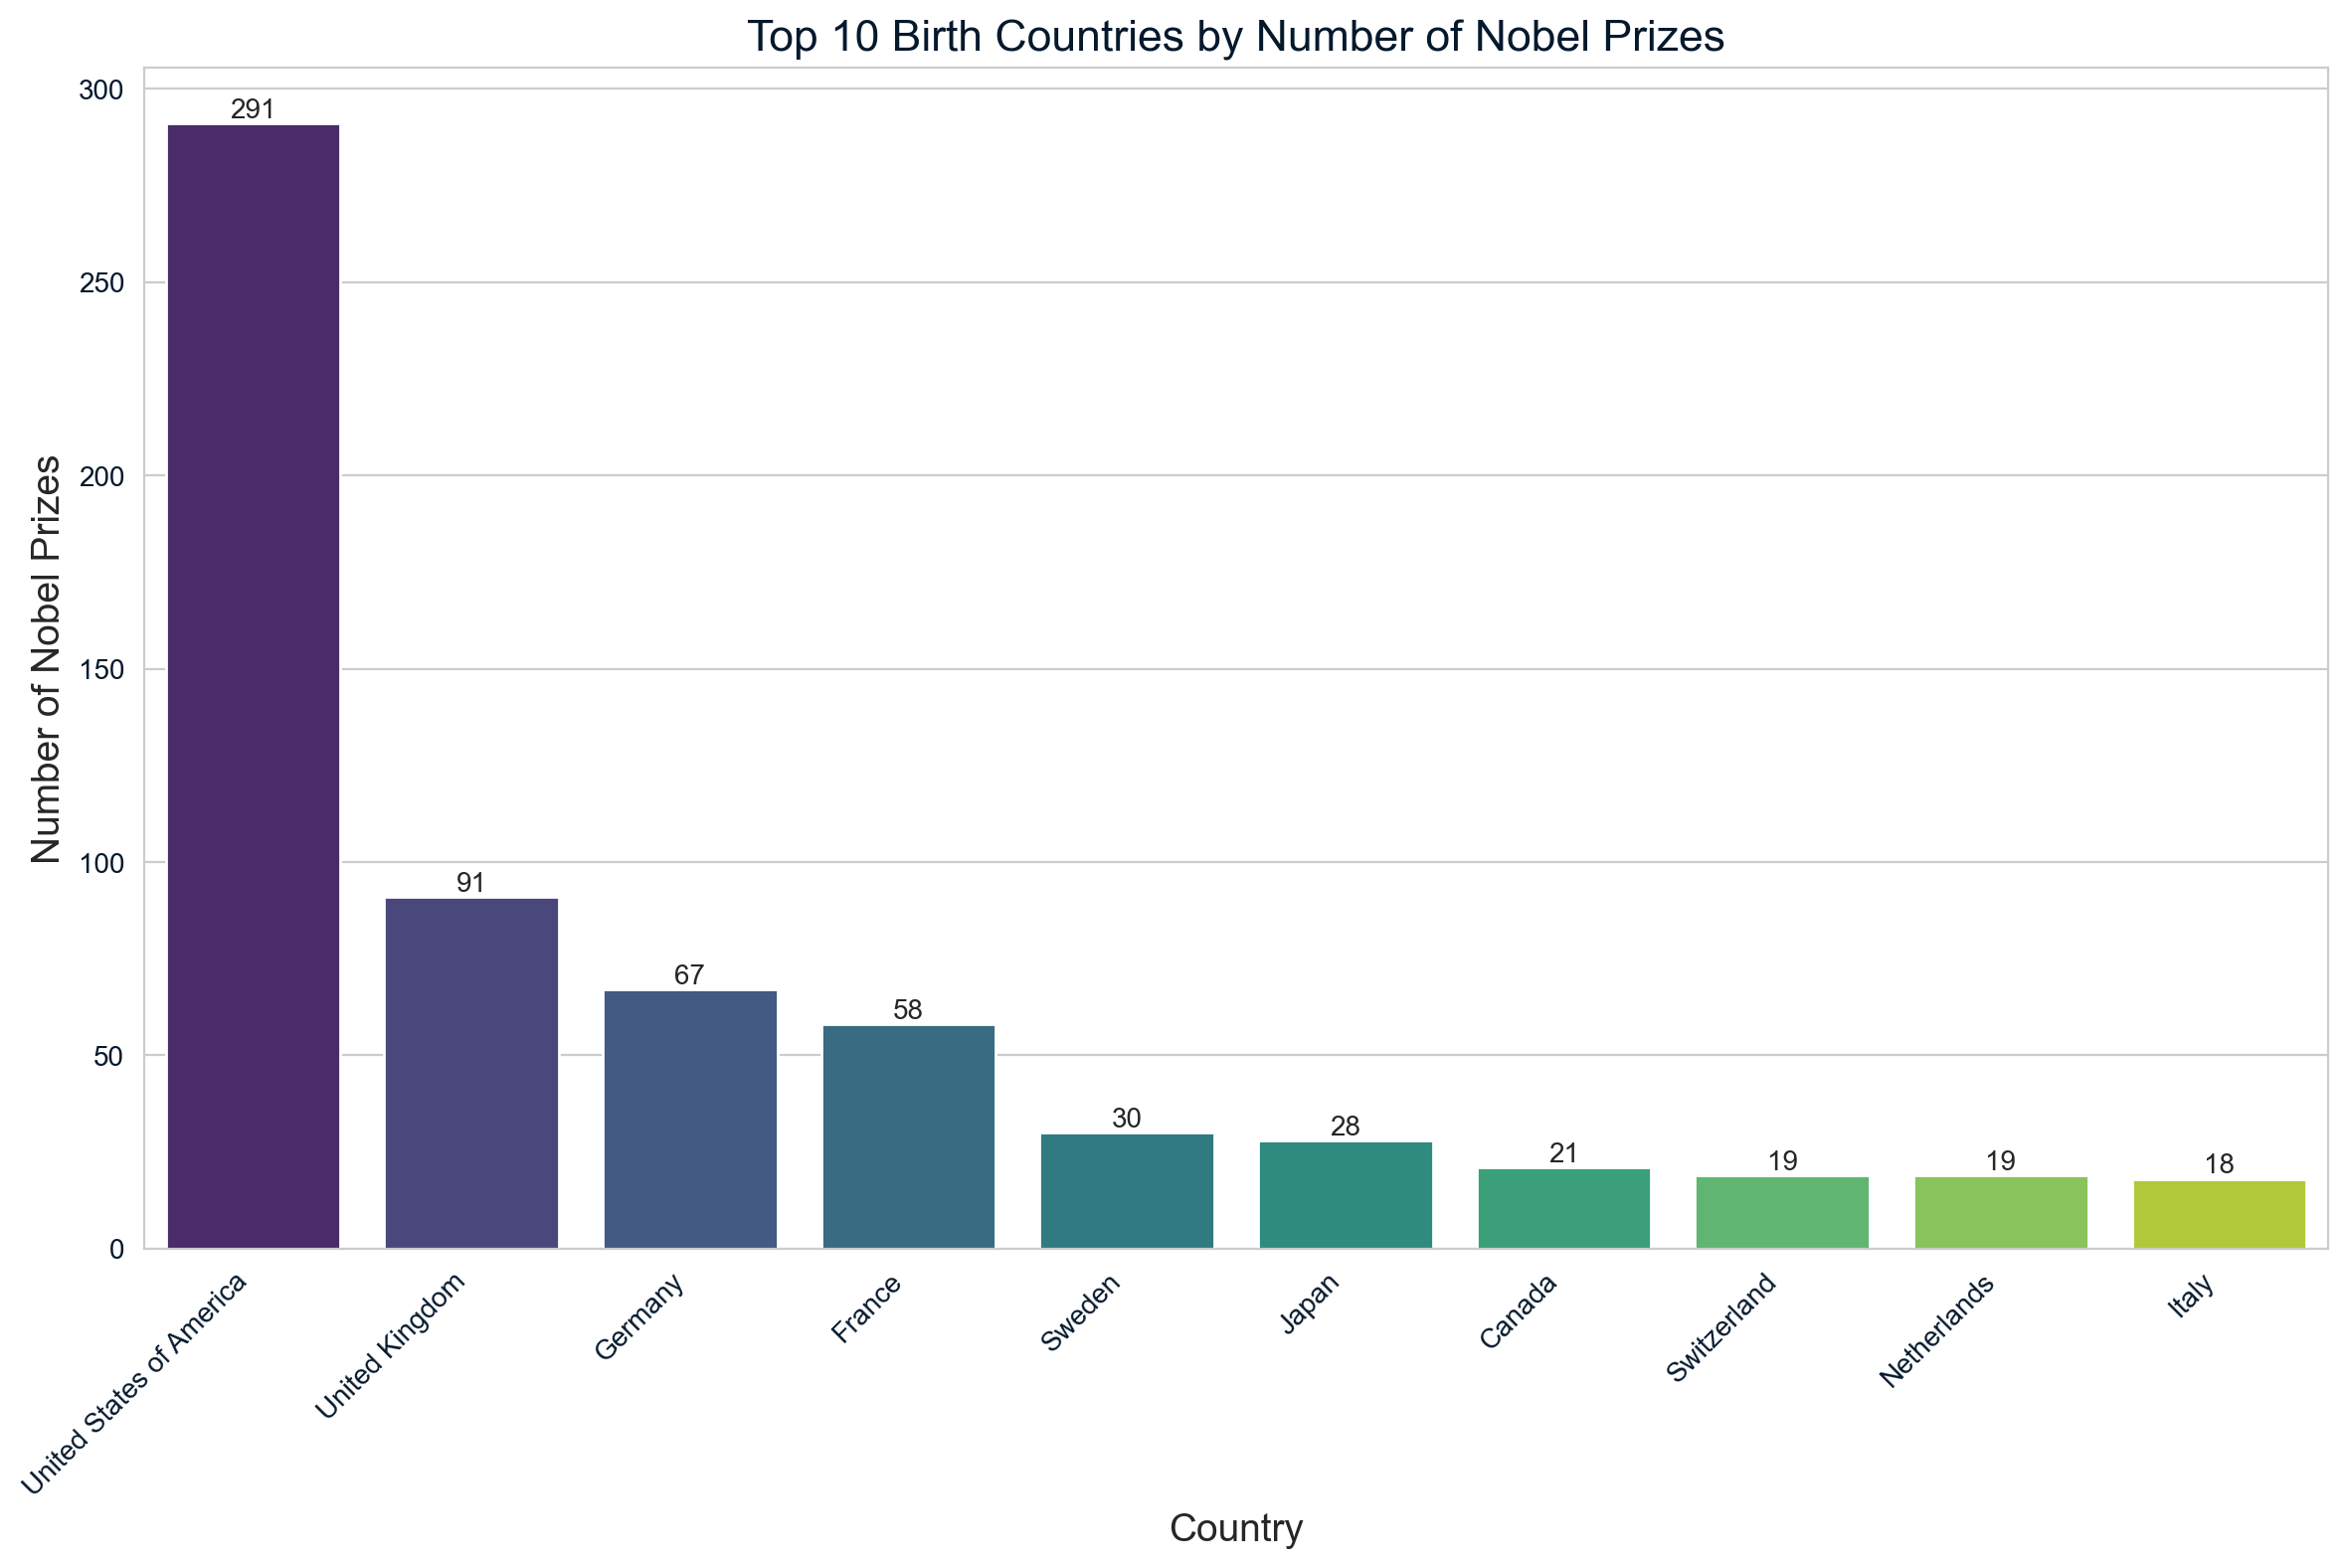

In [353]:
# counting number of nobel prizes per birth country
country_count = df["birth_country"].value_counts()
top_country = country_count.idxmax()
top_country_count = country_count.max()
print(f"the birth country with highest nobel prize awards : {top_country} , count : {top_country_count}")

# creating a dataframe that contains top 10 nobel winner countries
visual = country_count[0:10].to_frame().reset_index().rename(columns = {"index":"country", "birth_country":"count"})

# Create a bar plot for the top 10 birth countries
plt.figure(figsize=(12, 8))

# Bar plot
g = sns.barplot(x='country', y='count', data=visual, palette='viridis')

# Add data labels
for index, value in enumerate(visual['count']):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Customize the plot
g.set_title('Top 10 Birth Countries by Number of Nobel Prizes', fontsize=16)
g.set_xlabel('Country', fontsize=14)
g.set_ylabel('Number of Nobel Prizes', fontsize=14)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


# Identifying the decade with the highest ratio of US-born winners

In [354]:
df["usa_born_winner"] = df["birth_country"] == "United States of America"
df["decade"] = (np.floor(df["year"] / 10) * 10).astype(int)
max_decade_usa = df.groupby(["decade"], as_index = False)["usa_born_winner"].mean()
max_decade_usa = 2000
max_decade_usa

2000

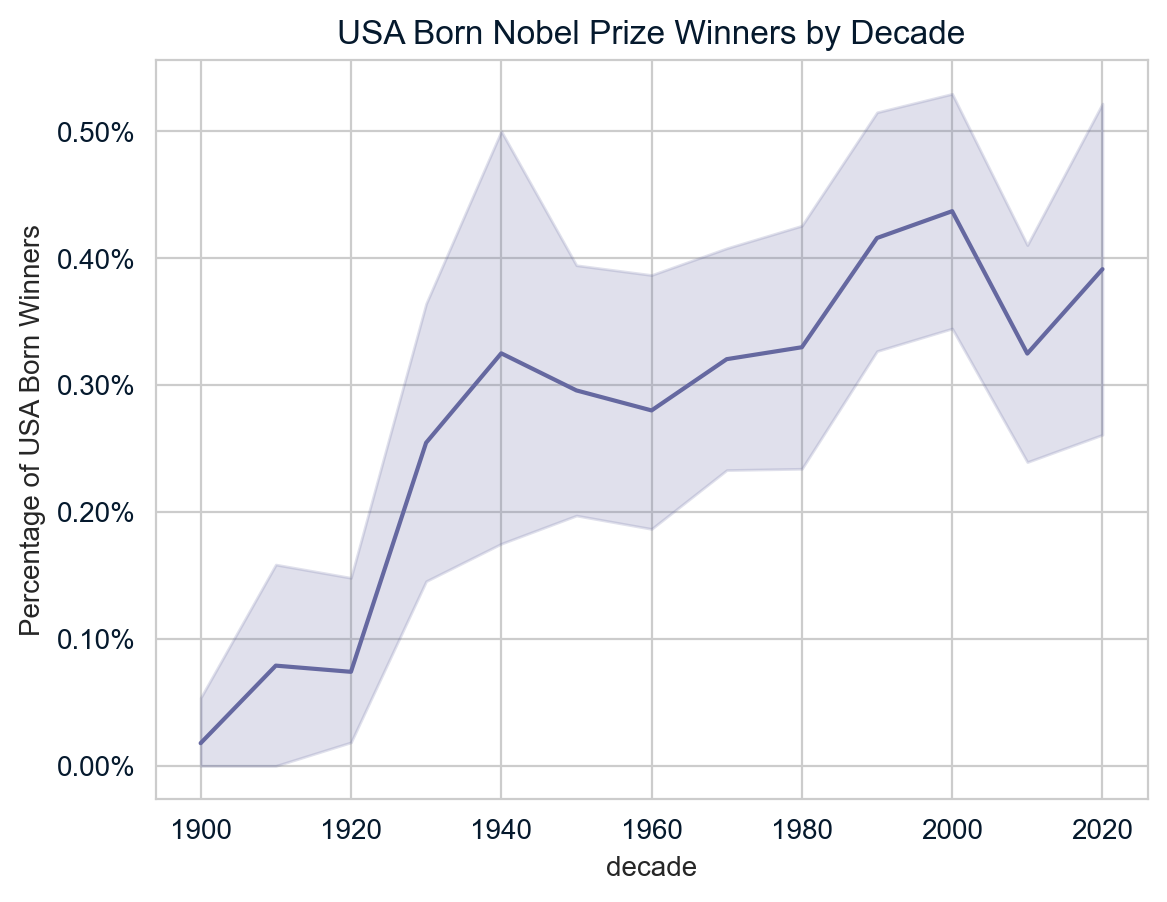

In [355]:
# visualizing the USA dominance across each decade

ax = sns.lineplot(x='decade', y='usa_born_winner', data=df)

# Set the y-axis to display percentages
ax.yaxis.set_major_formatter(mticker.PercentFormatter())

# Customize axes label and title
ax.set_ylabel('Percentage of USA Born Winners')
ax.set_title('USA Born Nobel Prize Winners by Decade')

# Display the plot
plt.show()

# Which decade and Nobel Prize category combination had the highest proportion of female laureates?

{2020: 'Literature'}


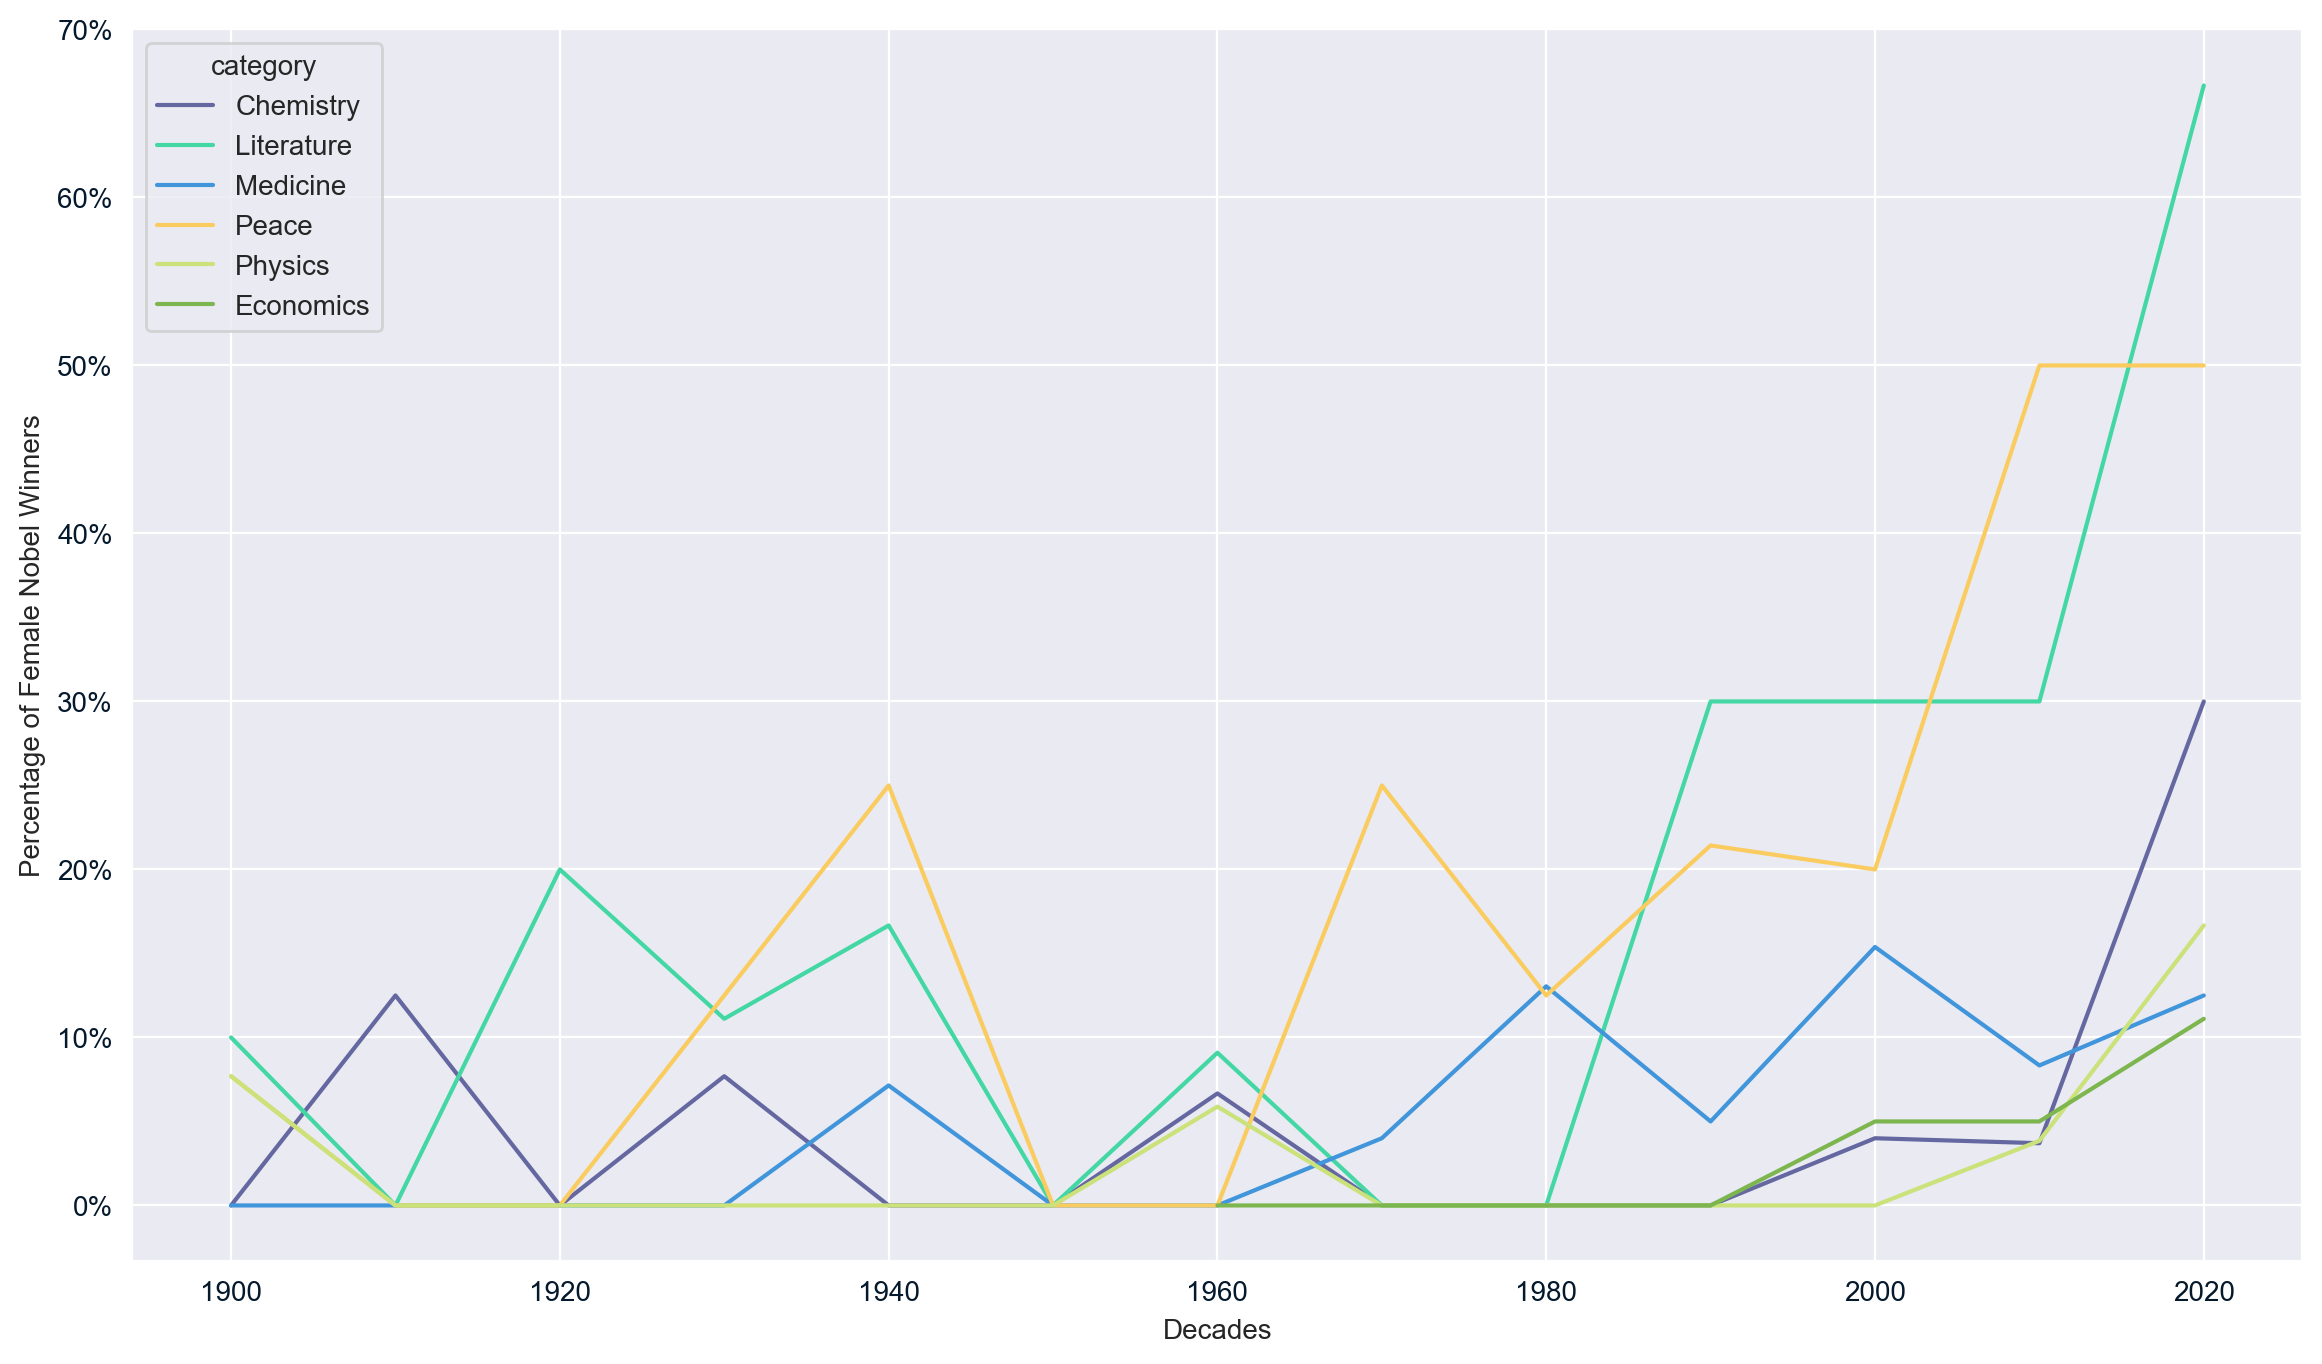

In [356]:
# Calculating the proportion of female laureates per decade
df['female_winner'] = df['sex']=='Female'
# Calculate the mean proportion of female winners by decade and category
female_decade = df.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
max_index = female_decade['female_winner'].idxmax()

max_female_dict = {
    female_decade.loc[max_index, 'decade']: female_decade.loc[max_index, 'category']
}
print(max_female_dict)

# Plotting USA born winners with % winners on the y-axis
plt.figure(figsize=(14,8))
sns.set_style("darkgrid")

ax = sns.lineplot(x = "decade", y = "female_winner", data = female_decade, hue = "category")

ax.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))
ax.set(xlabel = "Decades", ylabel = "Percentage of Female Nobel Winners")
plt.show()

# First Woman who won a Nobel Prize

In [357]:
# name of the first woman 
df.sort_values(by = ["year"], ascending = True)
female_winner = df[df["female_winner"] == True]

first_woman_name = female_winner["full_name"].iloc[0]
print(first_woman_name)

#category in which the first female Nobel Prize winner won
first_woman_category = female_winner["category"].iloc[0]
print(first_woman_category)

Marie Curie, née Sklodowska
Physics


# Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [358]:
data_path = "data/nobel.csv"
df = pd.read_csv(data_path)

repeated = df['full_name'].value_counts()
repeated = repeated[repeated >= 2].index

repeat_list = list(repeated)
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']

# How old were the winners of the Nobel Prize?

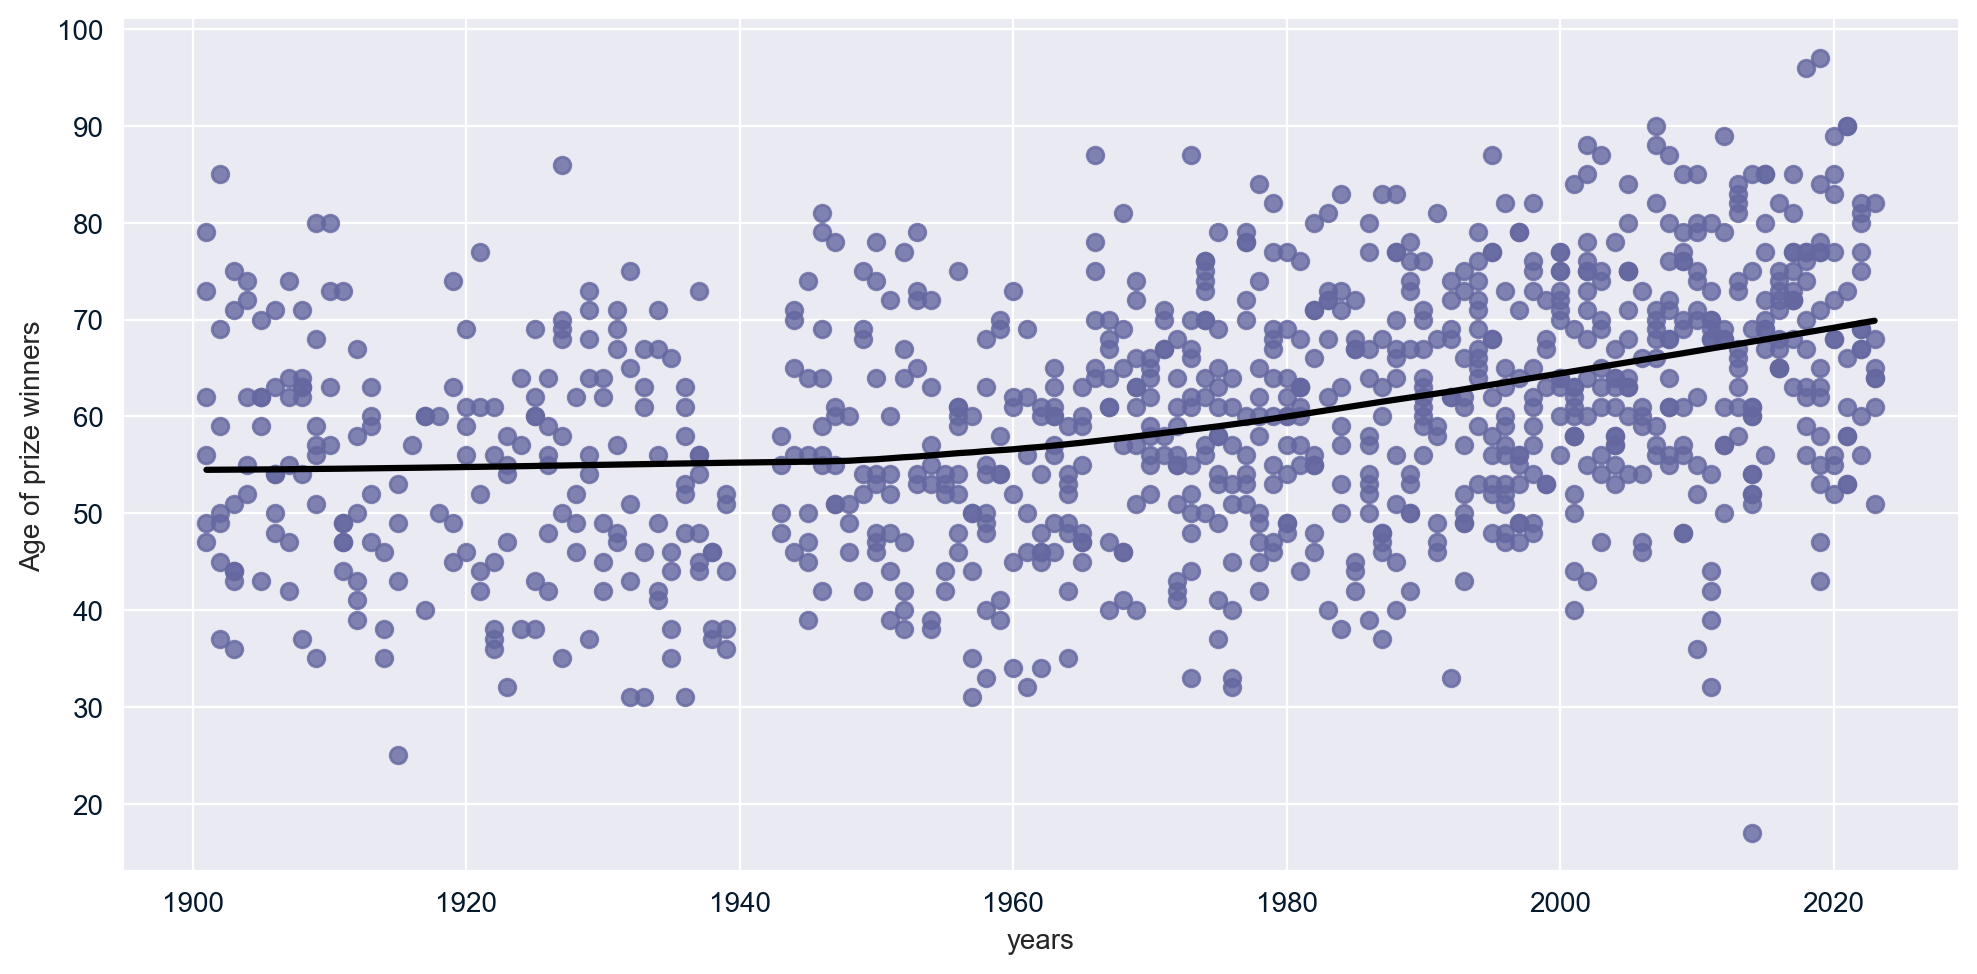

In [359]:
# Converting birth_date to datetime
df["birth_date"] = pd.to_datetime(df["birth_date"], format="%Y-%m-%d", errors = "coerce")

# Calculating age
df["age"] = df["year"] - df["birth_date"].dt.year

# Plotting their ages
sns.set_style("darkgrid")

sns.lmplot(x="year", y="age", data=df, lowess=True, aspect = 2, line_kws = {"color" : "black"})

plt.xlabel("years")
plt.ylabel("Age of prize winners")
plt.show()

# Who are the youngest and oldest Nobel Prize winner ?

In [360]:
# youngest winner
print(df.nsmallest(1, "age"))

# oldest winner
print(df.nlargest(1, "age"))


     year category                       prize  ... death_city death_country   age
885  2014    Peace  The Nobel Peace Prize 2014  ...        NaN           NaN  17.0

[1 rows x 19 columns]
     year   category  ...             death_country   age
942  2019  Chemistry  ...  United States of America  97.0

[1 rows x 19 columns]


# Is there a relation between age and the year in each category?

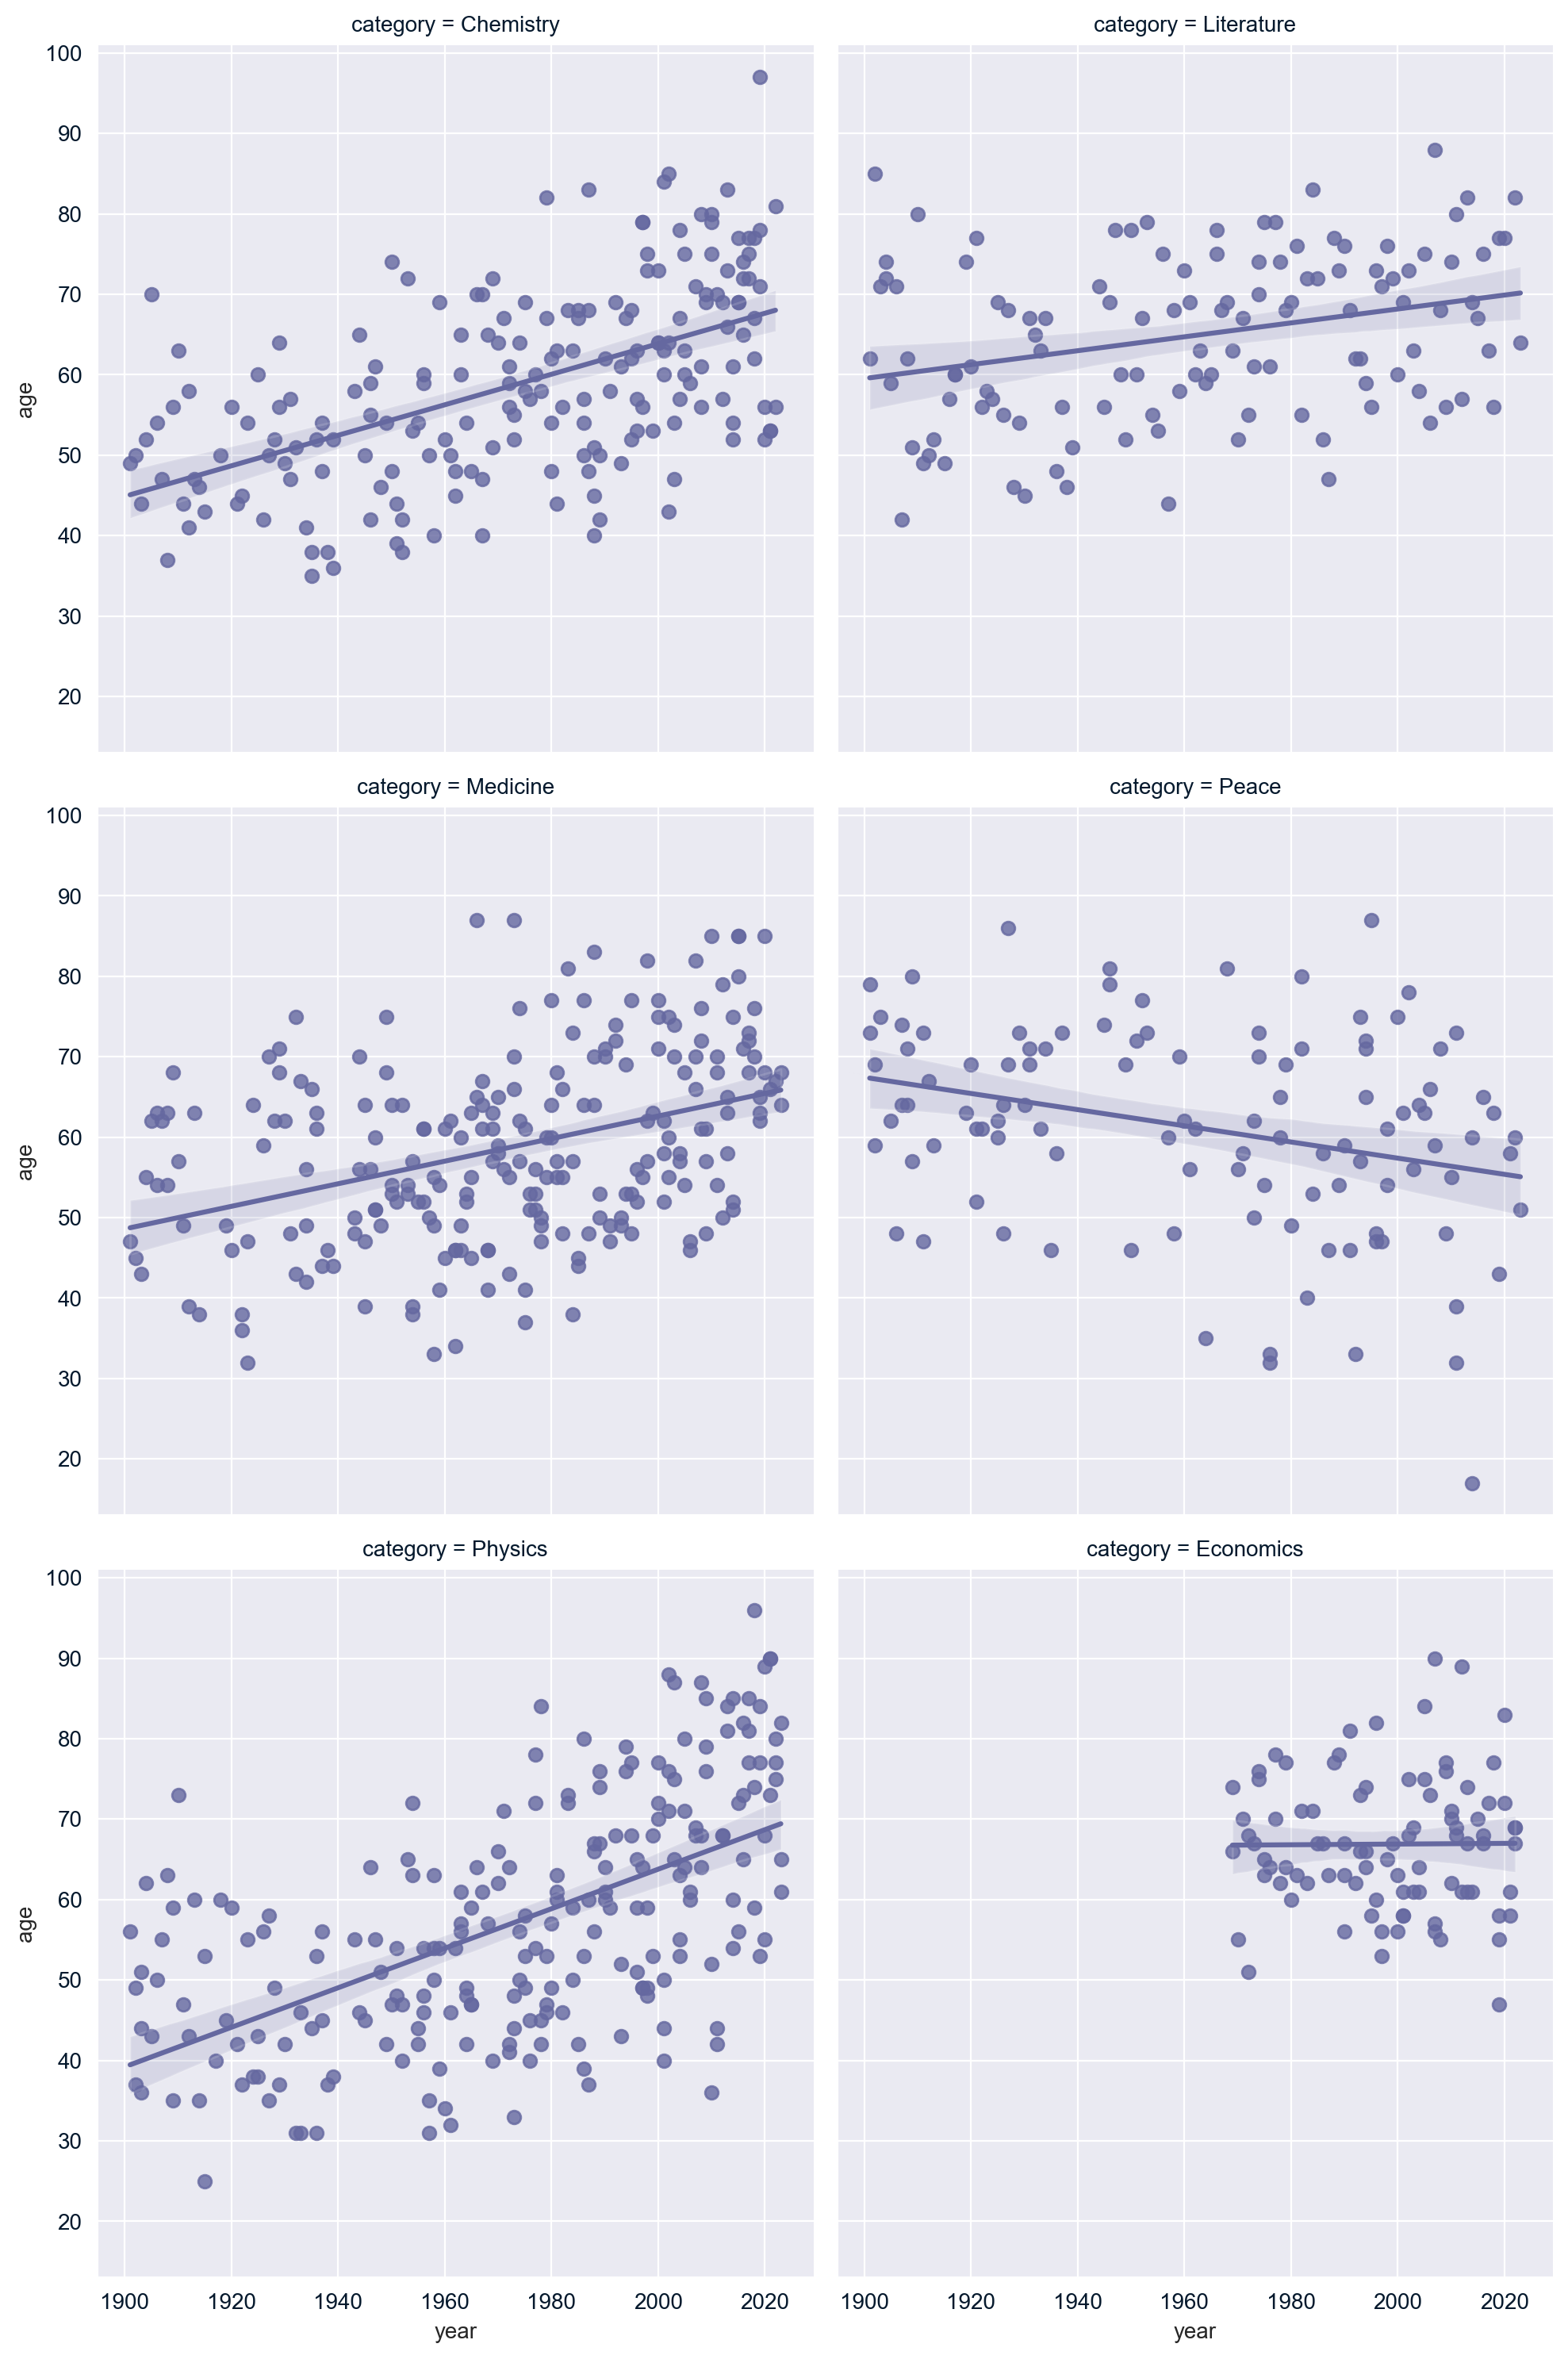

In [361]:
sns.lmplot(x='year', y='age', data=df, col='category', ci=95, col_wrap=2)

plt.show()